In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class KMeansClustering:
    def __init__(self,k=5,itr=100,plot_steps=False):
        self.k = k
        self.itr = itr
        self.plot_steps = plot_steps
        
        self.centroids = []
        self.clusters = [[] for _ in range(self.k)]
        
    def eucledianDistance(self,p1,p2):
        return np.sqrt(np.sum(p1-p2)**2)
    
    def predict(self,x):
        self.X = x
        self.n_samples, self.n_features = x.shape
        
        self.centroids = [x[idx] for idx in (np.random.choice(x.shape[0], self.k, replace=False))]
        
        for i in range(self.itr):
            self.creat_clusters(x)
            
            if self.plot_steps:
                self.plot()
                
            old_centroids = self.centroids
            self.centroids = self.calculate_new_centroids(self.clusters)
            
            if(self.is_centroids_changed(old_centroids,centroids)):
                break
                
            if self.plot_steps:
                self.plot()
                
        return self.get_cluster_labels(x.shape[0])
    
    def get_cluster_labels(self,size):
        labels = np.empty(size)
        for idx, cl in enumerate(self.clusters):
            for i in cl:
                labels[i] = idx
        return labels
        
    def creat_clusters(self,x):
        self.clusters = [[] for _ in range(self.k)]
        for i in range(x.shape[0]):
            cl = self.find_closest_centroids(x[i],self.centroids)
            self.clusters[cl].append(i)
            
    def find_closest_centroids(self,xi,centroid):
        dist = [self.eucledianDistance(xi,c) for c in centroid]
        return np.argmin(dist)
    
    def calculate_new_centroids(self,clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def is_centroids_changed(self,old,new):
        distance = [self.eucledianDistance(old[i], new[i]) for i in range(self.k)]
        return sum(distance) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)


(500, 2)
3


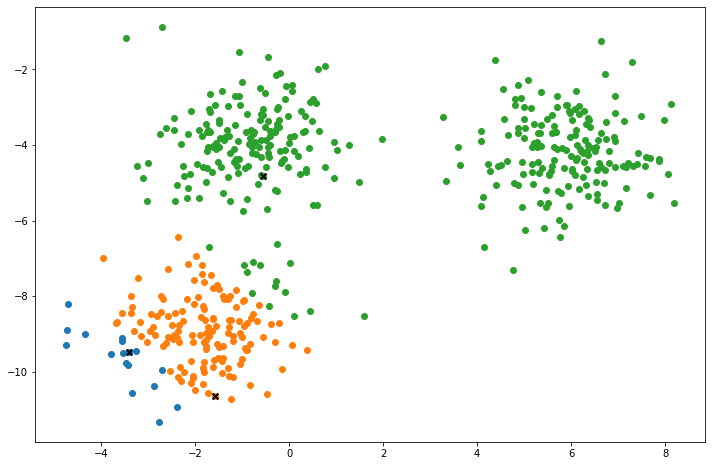

NameError: name 'centroids' is not defined

In [33]:
k = KMeansClustering(k=clusters, itr=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()